In [62]:
import pandas as pd
import random

df = pd.read_csv('data/imdb_top_1000.csv')
df.rename(columns={'Series_Title': 'title'}, inplace=True)
df.rename(columns={'Released_Year': 'year'}, inplace=True)
df.rename(columns={'Genre': 'genre'}, inplace=True)
df.rename(columns={'Overview': 'summary'}, inplace=True)

# replace content
df['actors'] = df[['Star1', 'Star2', 'Star3', 'Star4']].apply(lambda x: ' '.join(x), axis=1)

# reorder columns
df = df[['title', 'year', 'genre', 'summary', 'actors']]

# return dictionary
movies = df.to_dict('records')
random.shuffle(movies)
movies = movies[:25]
movies += [{
        'title': 'multimedia retrieval',
        'summary': 'this course discusses multimedia retrieval and indexing technology', 
        'genre': 'computer science'
    },{
        'title': 'endoplasmic reticulum',
        'summary': 'an endoplasmic cell line that is used to treat cancer', 
        'genre': 'medicine',
    }
]

movies[:3]

[{'title': 'Per un pugno di dollari',
  'year': 1964,
  'genre': 'Action, Drama, Western',
  'summary': 'A wandering gunfighter plays two rival families against each other in a town torn apart by greed, pride, and revenge.',
  'actors': 'Clint Eastwood Gian Maria Volontè Marianne Koch Wolfgang Lukschy'},
 {'title': 'Thor: Ragnarok',
  'year': 2017,
  'genre': 'Action, Adventure, Comedy',
  'summary': 'Imprisoned on the planet Sakaar, Thor must race against time to return to Asgard and stop Ragnarök, the destruction of his world, at the hands of the powerful and ruthless villain Hela.',
  'actors': 'Chris Hemsworth Tom Hiddleston Cate Blanchett Mark Ruffalo'},
 {'title': 'The Bridge on the River Kwai',
  'year': 1957,
  'genre': 'Adventure, Drama, War',
  'summary': 'British POWs are forced to build a railway bridge across the river Kwai for their Japanese captors, not knowing that the allied forces are planning to destroy it.',
  'actors': 'William Holden Alec Guinness Jack Hawkins Ses

In [63]:
from sentence_transformers import SentenceTransformer

model_name = 'nq-distilbert-base-v1'
strf = SentenceTransformer(model_name)

In [64]:
vectors = strf.encode([m['title'] + m['summary'] + m['genre'] for m in movies])

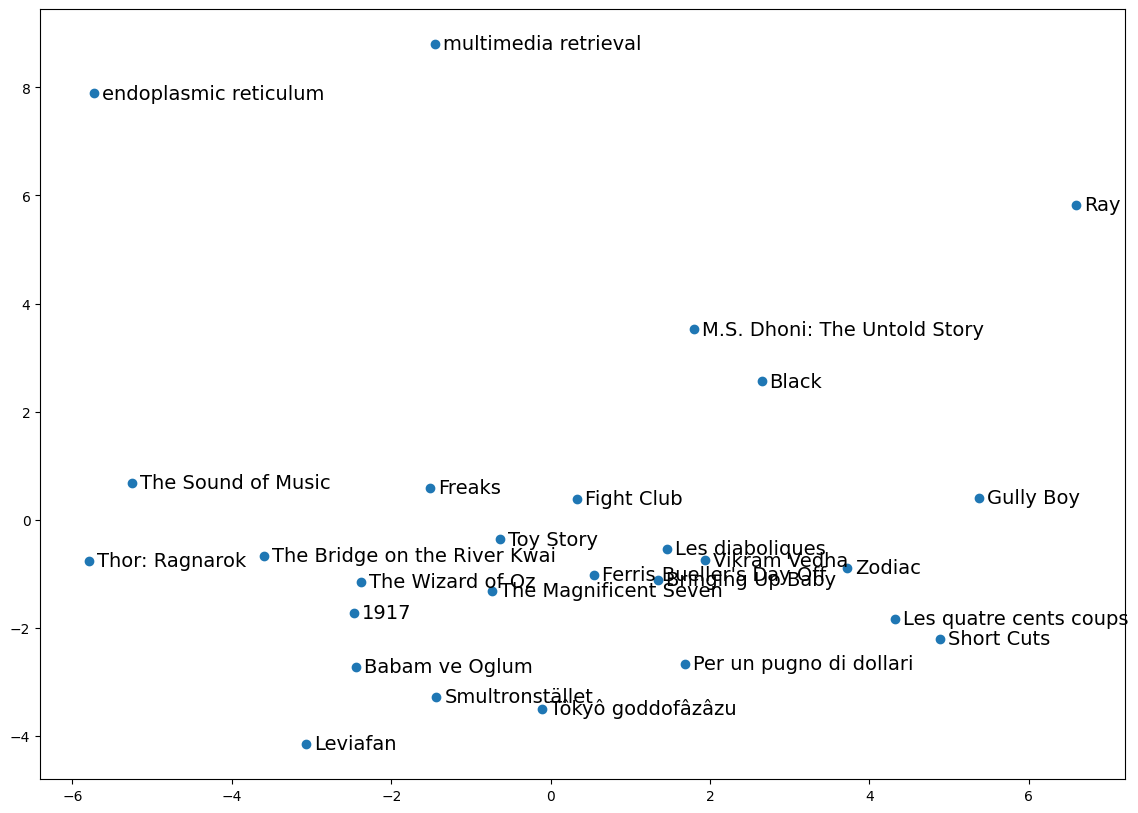

In [80]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# apply a PCA to map to 2 dimensions
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

# create a scatter plot of the projection
plt.figure(figsize=(14,10))
plt.scatter(result[:, 0], result[:, 1])
for i, r in enumerate(result):
    plt.annotate(movies[i]['title'], xy=(r[0]+0.1, r[1]-0.1), fontsize=14)
plt.show()

In [95]:
from sklearn.cluster import KMeans
from collections import defaultdict
kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit(vectors)
classes = kmeans.predict(vectors)

groups = defaultdict(list)
for i in range(len(movies)):
    groups[classes[i]].append(movies[i]['title'])

groups

TypeError: KNeighborsClassifier.fit() missing 1 required positional argument: 'y'

In [91]:
kmeans.transform(vectors[:])

array([[12.472217 , 12.524826 , 11.309887 ,  9.658242 , 13.647787 ,
        16.557589 , 17.41947  , 13.240855 ],
       [14.138791 , 11.926382 , 12.661592 , 12.634773 ,  6.9703736,
        15.944378 , 18.777925 , 13.48726  ],
       [14.254152 ,  8.968882 , 12.187786 , 12.731728 , 13.9110365,
        18.029871 , 19.154142 , 14.1548605],
       [15.978562 , 16.359072 , 15.998154 , 14.631012 , 17.233906 ,
        19.65987  ,  0.       , 17.317343 ],
       [15.06007  , 13.092636 , 13.632663 , 12.532447 , 14.153127 ,
        16.043825 , 18.321123 ,  7.2740035],
       [13.982178 , 12.607514 , 12.295085 , 10.488937 , 14.384263 ,
        18.036942 , 18.546566 , 15.385085 ],
       [13.644368 , 13.724139 ,  9.485619 , 11.1695175, 13.423849 ,
        17.408823 , 19.23718  , 14.251318 ],
       [ 6.776342 , 14.008811 , 12.089556 , 12.047879 , 14.203918 ,
        17.441288 , 16.4764   , 14.863282 ],
       [13.735364 , 12.185834 ,  9.513601 , 12.313645 , 14.099962 ,
        18.237053 , 18.11616